## DYLEMAT STUDENTA 

## WINO WYTRAWNE CZY WINO TANIE I OBIAD ?

### a. wyznaczanie jakosci wina na podstawie parametrow cieczy

### b. aplikacja dla urzedu kontrolujacego winiarnie

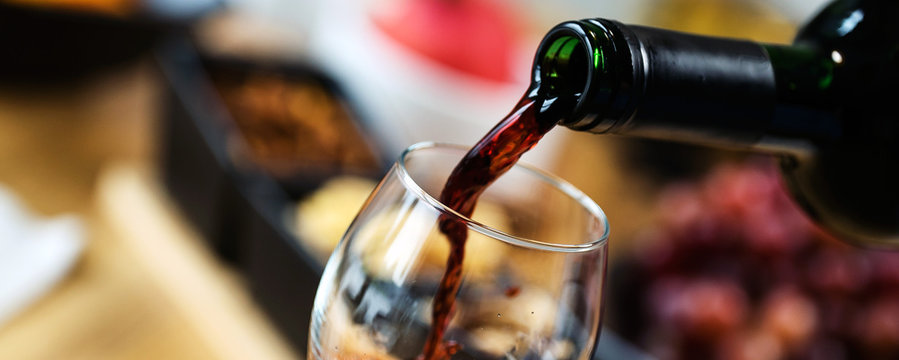

In [1]:
from IPython.display import Image
Image(filename='wine_logo2.jpg')

This study consider *vinho verde*, a unique product from the Minho (north-west) region of Portugal.

The data were collected from May/2004 to February/2007

Each sample was evaluated by a minimum of three sensory assessors (using blindtastes), which graded the wine in a scale that ranges from 1 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, fbeta_score, make_scorer, roc_curve

from collections import Counter
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('winequality-red.csv')

## EDA

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().style.set_properties(**{"text-align":"center", "padding":"15px"})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking the share of individual categories

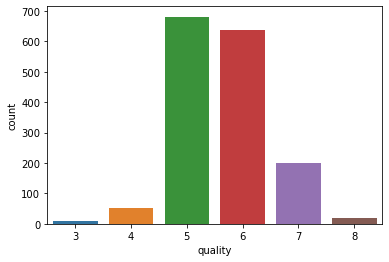

In [7]:
# ax = sns.countplot(x=df.quality,
#                   order=df.quality.value_counts().index)
# abs_values = df["quality"].value_counts().values
# ax.bar_label(container=ax.containers[0], labels=abs_values);

ax = sns.countplot(x=df.quality);

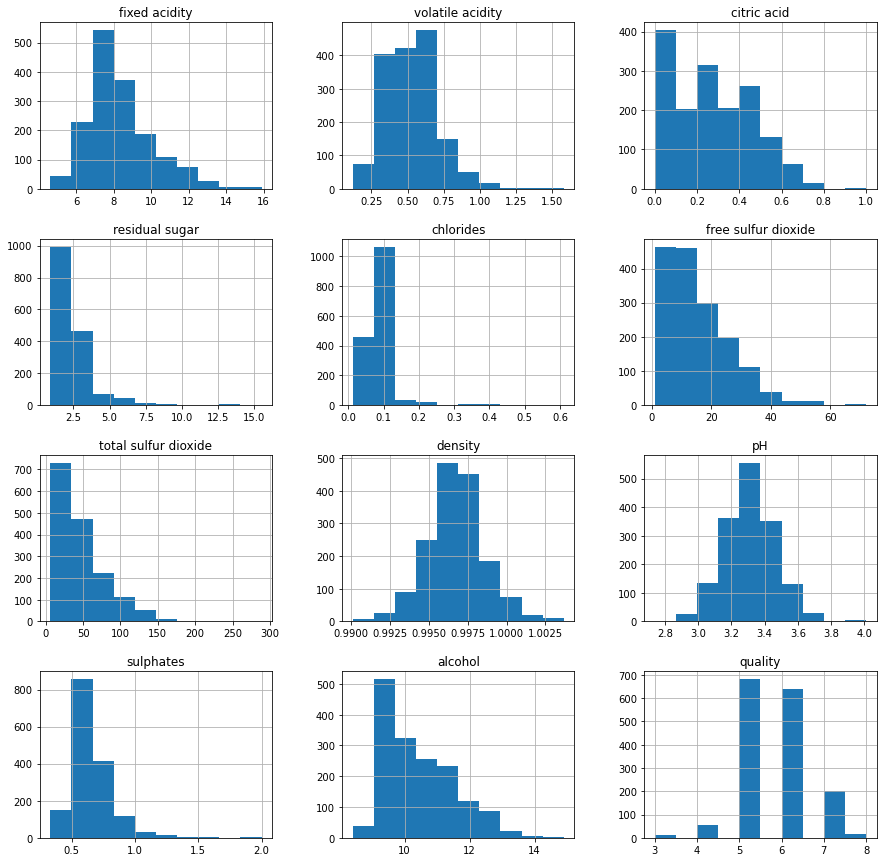

In [8]:
# Histograms for all variables

df.hist(figsize=(15, 15));

#### Variables : alcohol, total sulfur dioxide, free sulfur dioxide i residual sugar can be logarithmized at a later stage

In [9]:
# # Boxplot's

# sns.set_theme(style="whitegrid")

# list_columns = list(df.drop("quality", axis=1).columns)

# for column in list_columns:
#     f, ax = plt.subplots(figsize=(7, 5))
#     sns.boxplot(x=df["quality"], y=df[column], palette="vlag")
# #     ax.set_xlabel(df["quality"],fontsize=15)
#     ax.tick_params(labelsize=15);

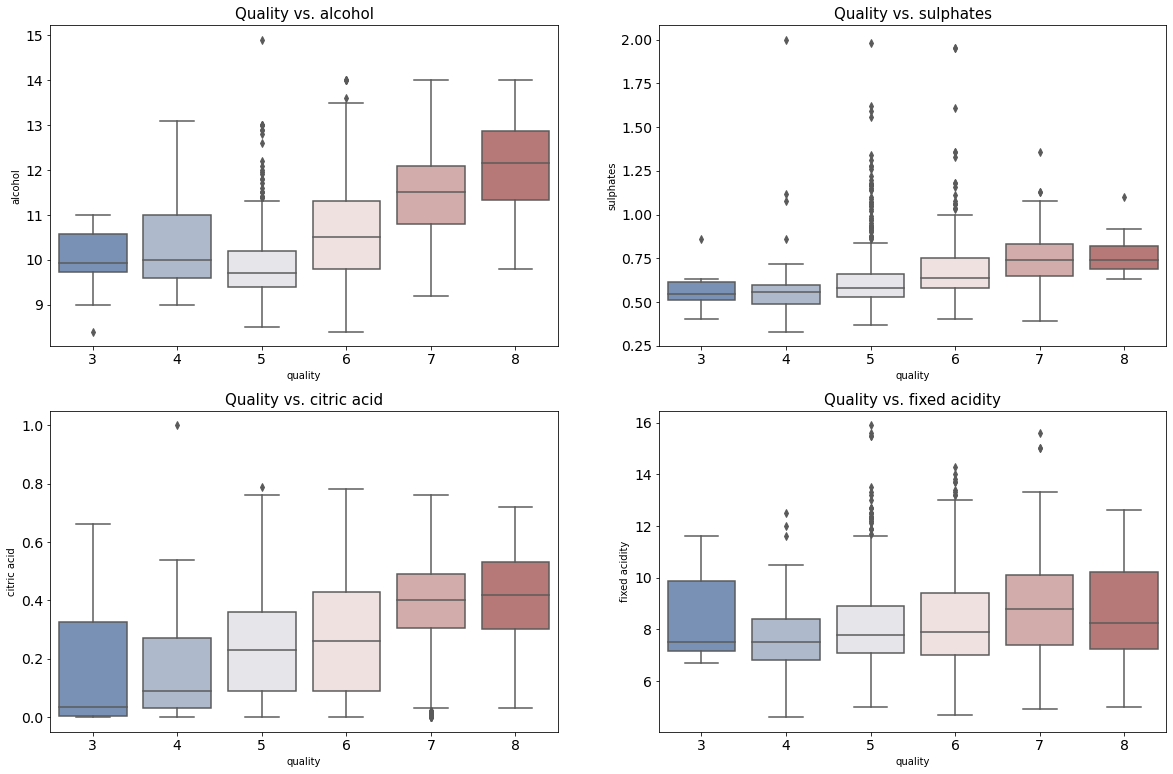

In [10]:
# Quality Increasing

fig, axes = plt.subplots(2, 2, figsize=(20, 13))

sns.boxplot(ax=axes[0, 0], x=df["quality"], y=df["alcohol"], palette="vlag")
axes[0, 0].tick_params(labelsize=14)
axes[0, 0].set_title("Quality vs. alcohol", fontsize=15)

sns.boxplot(ax=axes[0, 1], x=df["quality"], y=df["sulphates"], palette="vlag")
axes[0, 1].tick_params(labelsize=14)
axes[0, 1].set_title("Quality vs. sulphates", fontsize=15)

sns.boxplot(ax=axes[1, 0], x=df["quality"], y=df["citric acid"], palette="vlag")
axes[1, 0].tick_params(labelsize=14)
axes[1, 0].set_title("Quality vs. citric acid", fontsize=15)

sns.boxplot(ax=axes[1, 1], x=df["quality"], y=df["fixed acidity"], palette="vlag")
axes[1, 1].tick_params(labelsize=14)
axes[1, 1].set_title("Quality vs. fixed acidity", fontsize=15);

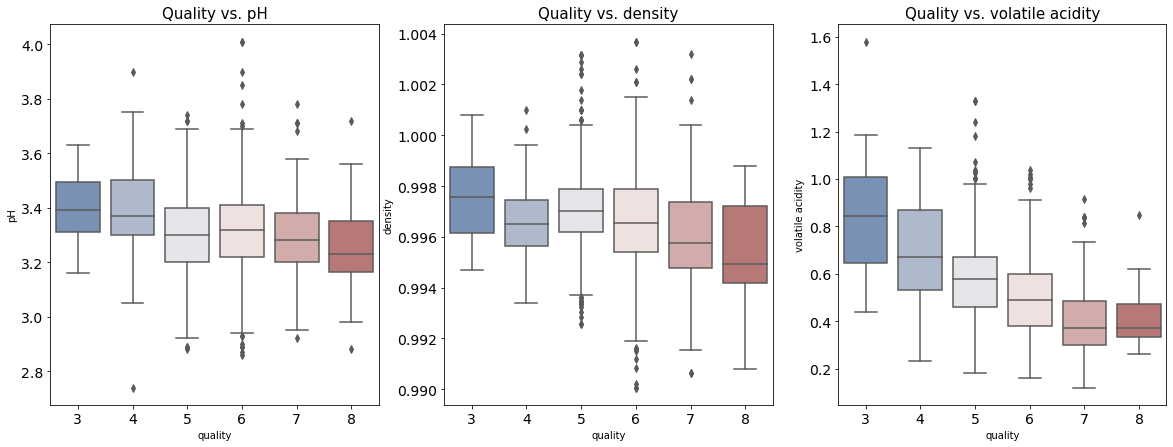

In [11]:
# Quality Decreasing

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.boxplot(ax=axes[0], x=df["quality"], y=df["pH"], palette="vlag")
axes[0].tick_params(labelsize=14)
axes[0].set_title("Quality vs. pH", fontsize=15)


sns.boxplot(ax=axes[1], x=df["quality"], y=df["density"], palette="vlag")
axes[1].tick_params(labelsize=14)
axes[1].set_title("Quality vs. density", fontsize=15)

sns.boxplot(ax=axes[2], x=df["quality"], y=df["volatile acidity"], palette="vlag")
axes[2].tick_params(labelsize=14)
axes[2].set_title("Quality vs. volatile acidity", fontsize=15);

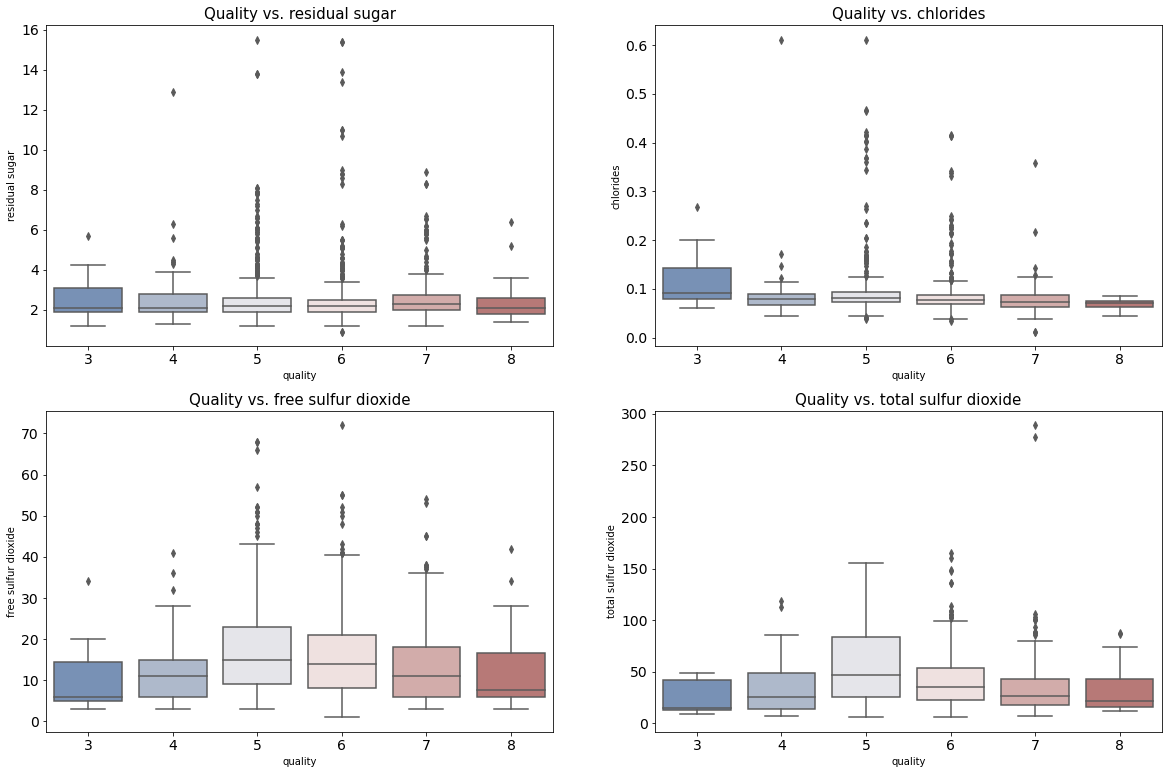

In [12]:
# No visible correlation

fig, axes = plt.subplots(2, 2, figsize=(20, 13))

sns.boxplot(ax=axes[0, 0], x=df["quality"], y=df["residual sugar"], palette="vlag")
axes[0, 0].tick_params(labelsize=14)
axes[0, 0].set_title("Quality vs. residual sugar", fontsize=15)

sns.boxplot(ax=axes[0, 1], x=df["quality"], y=df["chlorides"], palette="vlag")
axes[0, 1].tick_params(labelsize=14)
axes[0, 1].set_title("Quality vs. chlorides", fontsize=15)

sns.boxplot(ax=axes[1, 0], x=df["quality"], y=df["free sulfur dioxide"], palette="vlag")
axes[1, 0].tick_params(labelsize=14)
axes[1, 0].set_title("Quality vs. free sulfur dioxide", fontsize=15)

sns.boxplot(ax=axes[1, 1], x=df["quality"], y=df["total sulfur dioxide"], palette="vlag")
axes[1, 1].tick_params(labelsize=14)
axes[1, 1].set_title("Quality vs. total sulfur dioxide", fontsize=15);

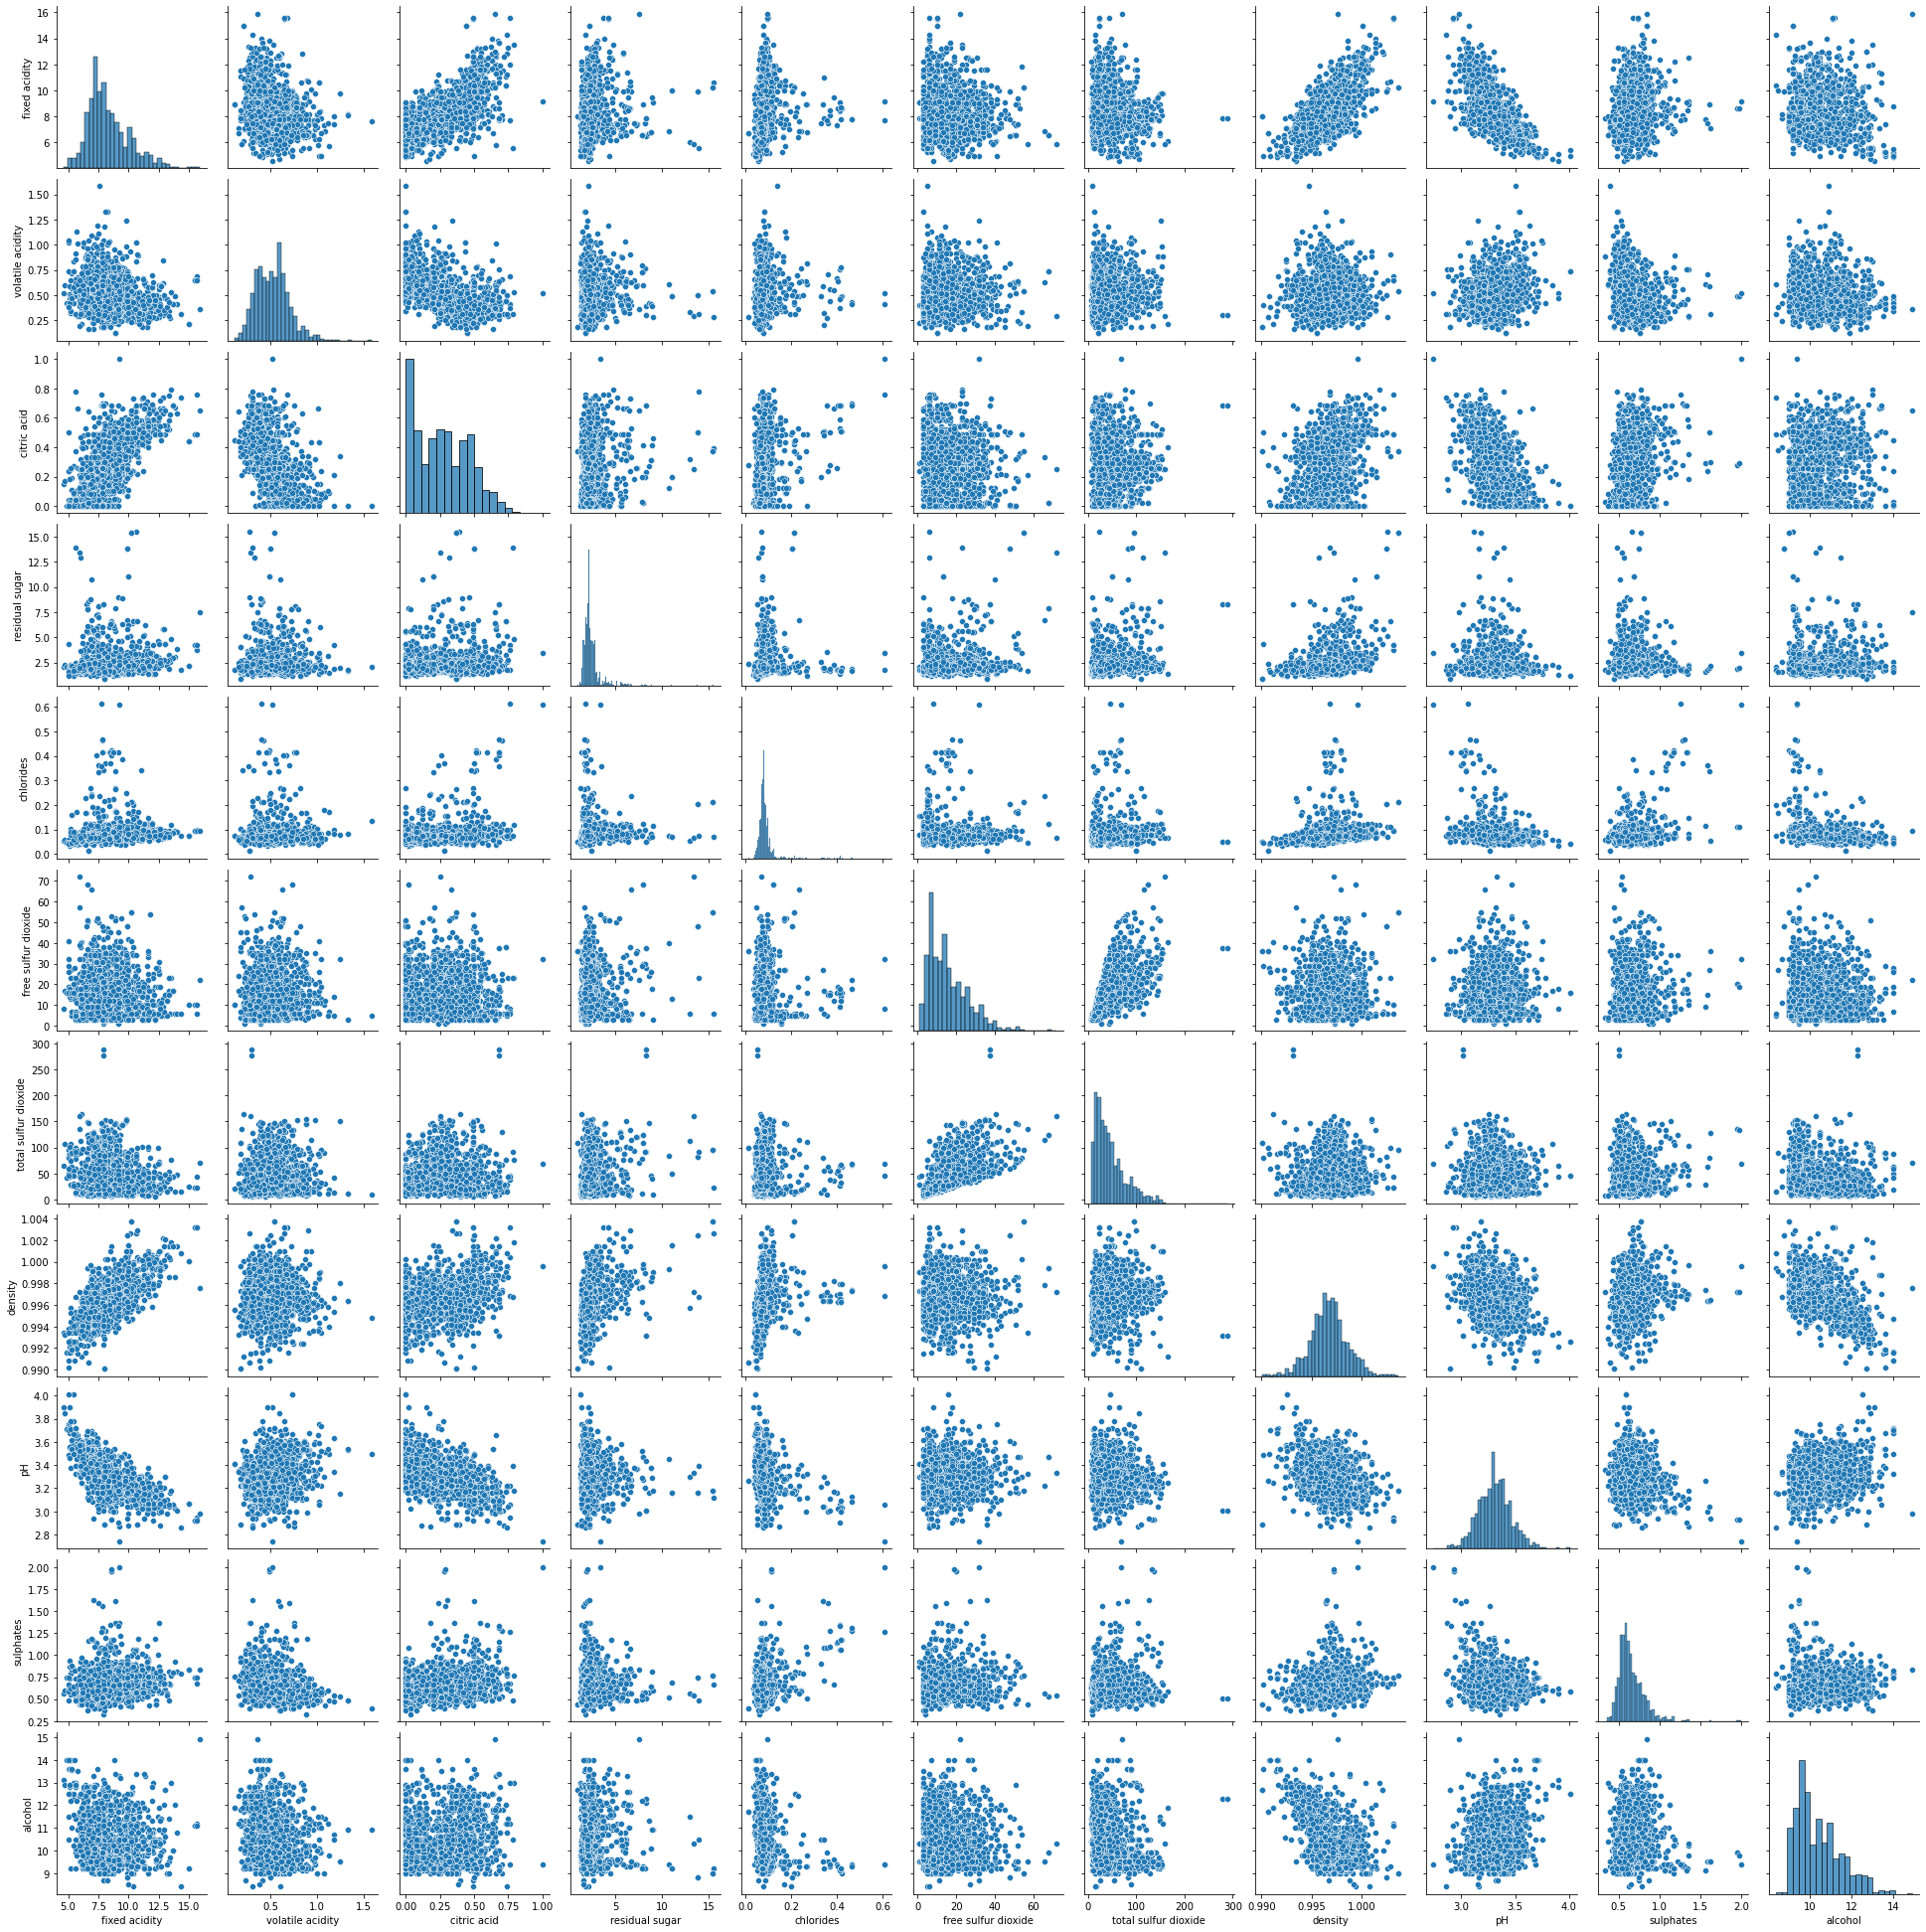

In [13]:
# Correlations

sns.pairplot(df.drop("quality", axis=1));

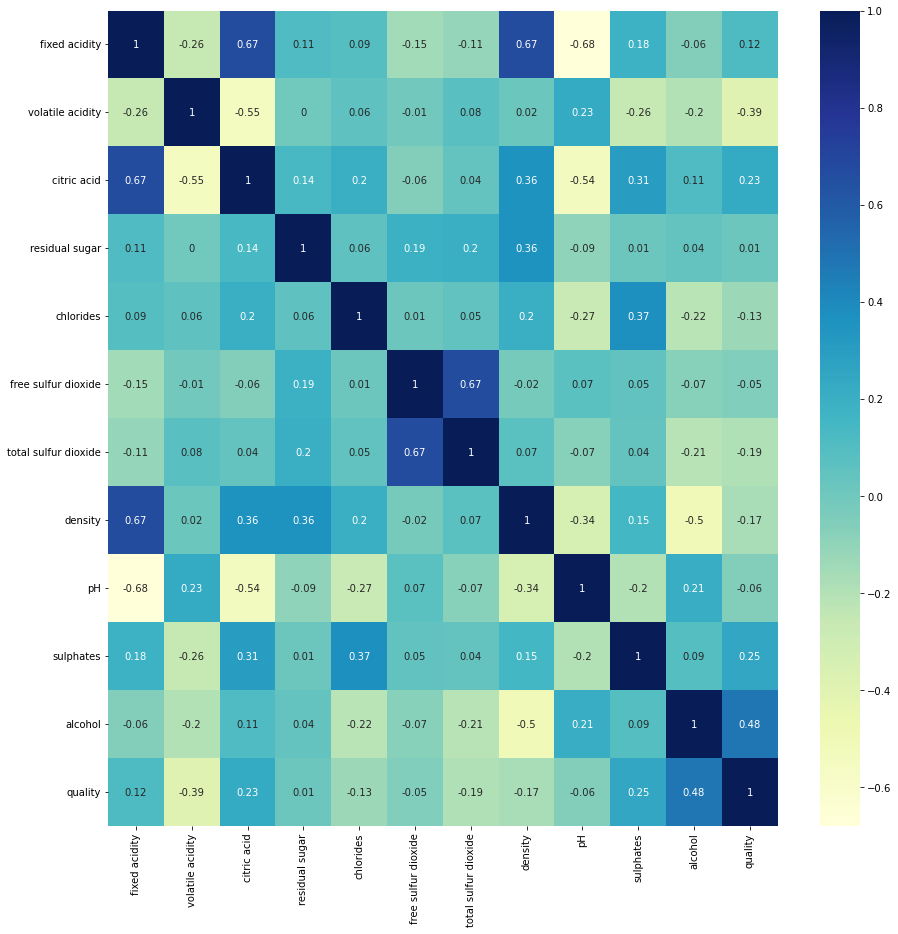

In [14]:
# Heatmap

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(round(df.corr(), 2), cmap="YlGnBu", annot = True);

## Data preparation for model building

### Changing the target into two categories

#### Przeliczenie ze skali Parkera na skalę zastosowaną w zestawie danych

Klasa 10 – 96 do 100 punktów, są to wina idealne, o głębi nieporównywalnej z niczym oraz spełniające wszystkie nasze oczekiwania.

Klasa 9 – 90 do 95 punktów, to wina doskonałe, skomplikowane i o niezwykłym charakterze.

Klasa 7, 8 – 80 do 89 punktów, mieszczą się tu wina dobre, niczym nie zaburzone, posiadające własny styl i finezję.

---

Klasa 5, 6 – 70 do 79 punktów, jest to kategoria dla win przeciętnych, w żaden sposób nie wyróżniających się, jednak zrobionych poprawnie.

Klasa 3, 4 – 60 do 69 punktów, są to wina złe obdarzone licznymi wadami, takimi jak nadmierna kwasowość, taniczność, słodycz, lub brak jakiegokolwiek aromatu.

Klasa 1, 2 – 50 do 59 punktów, to wina nie nadające się do konsumpcji.

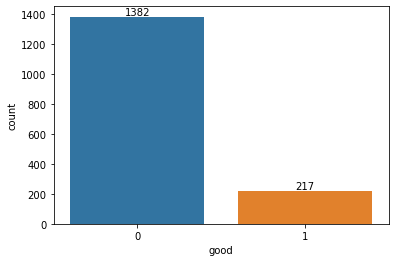

In [15]:
df["good"] = 0
df.loc[df["quality"] > 6.5, "good"] = 1

ax = sns.countplot(x=df.good,
                  order=df.good.value_counts(ascending=False).index)

abs_values = df["good"].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Dealing with outliers

In [16]:
# Dealing with outliers (values greater than 3 standard deviations) 

z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_out = df[filtered_entries]

print("Number of records before removing outliers: ", df.shape[0])
print("Number of records after removing outliers: ", df_out.shape[0])
print("Number of records after removing outliers in each class: ", df_out.good.value_counts())

Number of records before removing outliers:  1599
Number of records after removing outliers:  1451
Number of records after removing outliers in each class:  0    1250
1     201
Name: good, dtype: int64


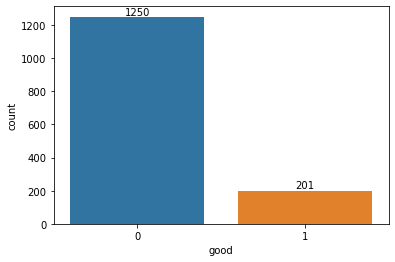

In [17]:
ax = sns.countplot(x=df_out.good,
                  order=df_out.good.value_counts(ascending=False).index)

abs_values = df_out["good"].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

### Division into a training set and a test set

In [18]:
# Division into a training set and a test set

X = df_out.drop(["quality", "good"], axis=1)
y = df_out.good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df_out.good, random_state=0)

print("Train samples: {}.".format(X_train.shape[0]))
print("Test samples: {}.".format(X_test.shape[0]))
print("Percent of positive values in train set: {:.2f}%".format(sum(y_train)/len(y_train)))
print("Percent of positive values in test set: {:.2f}%".format(sum(y_test)/len(y_test)))

Train samples: 1015.
Test samples: 436.
Percent of positive values in train set: 0.14%
Percent of positive values in test set: 0.14%


### Normalization

In [19]:
# Normalization of the training set to normal distribution, determination of mean values and standard deviations
# https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)

# print(scaler.mean_, scaler.scale_)

# Normalization of the test set to a normal distribution using mean values and std dev from the training set

X_test_std = scaler.transform(X_test)

## Initial models evaluation

### Tested models:

- Logistic Regression
- RandomForest
- XgBoost
- GaussianNB
- KNearestNeighbours
- AdaBoost
- SVC

In [20]:
def run_model(model, X, y, cross_val):
    """
    function that performs validation on the selected model

    input:
            model: model of the estimator from the sklearn package
            X: features to carry out learning
            y: target
            cross_val: type of validation
    output/print:
            roc_aur_score: roc_aur_ovr result for each fold / averaged later 
    """
    model_name = type(model).__name__
    
    fbeta_scorer = make_scorer(fbeta_score, beta=2.0, average="weighted")

    roc_auc_score = cross_val_score(model, X, y, cv=cross_val, scoring="roc_auc")
    f_beta = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)
    recall = cross_val_score(model, X, y, cv=cross_val, scoring="recall")
    
    print("{}: fbeta: {:.3f},   roc_auc_score: {:.3f},   recall: {:.3f}".format(model_name, f_beta.mean(), np.mean(roc_auc_score), recall.mean()))

In [21]:
# validation type
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# simple model definition
model_LR = LogisticRegression(solver='liblinear', random_state=12)
model_RF = RandomForestClassifier(random_state=12)
model_xgb = xgb.XGBClassifier(eval_metric="error", random_state=12)
model_NB = GaussianNB()
model_KNN = KNeighborsClassifier()
model_ADA = AdaBoostClassifier(random_state=12)
model_SVM = SVC(random_state=12, probability=True)

# adding models to the list that we will iterate through
models = [model_LR, model_RF, model_xgb, model_NB, model_KNN, model_ADA, model_SVM]

# evaluation of models before optimization
for model in models:
    run_model(model, X_train_std, y_train, skf)

LogisticRegression: fbeta: 0.879,   roc_auc_score: 0.879,   recall: 0.383
RandomForestClassifier: fbeta: 0.896,   roc_auc_score: 0.902,   recall: 0.475
XGBClassifier: fbeta: 0.896,   roc_auc_score: 0.874,   recall: 0.539
GaussianNB: fbeta: 0.855,   roc_auc_score: 0.853,   recall: 0.695
KNeighborsClassifier: fbeta: 0.868,   roc_auc_score: 0.823,   recall: 0.447
AdaBoostClassifier: fbeta: 0.870,   roc_auc_score: 0.844,   recall: 0.447
SVC: fbeta: 0.880,   roc_auc_score: 0.843,   recall: 0.326


In [22]:
def train_predict(model, X_true, y_true):
    """
    a function that performs fit and predict with the selected model on the training set

    input:
            model: model of the estimator from the sklearn package
            X_true: features to carry out learning (training set)
            y_true: target (training set)
    
    output/print:
            confusion matrix: table of errors for a given model
            classification_report: report of the various metrics designated for the model
    """
    
    model_name = type(model).__name__
    
    model.fit(X_true, y_true)
    y_pred = model.predict(X_true)
    
    print("Confusion matrix - {}".format(model_name))
    
    skplt.metrics.plot_confusion_matrix(y_true=y_true, y_pred=y_pred, normalize=False)
    plt.show()
    
    print("Classification report: \n", classification_report(y_true, y_pred))

Confusion matrix - LogisticRegression


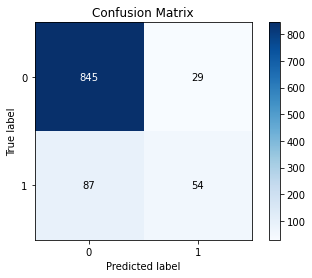

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       874
           1       0.65      0.38      0.48       141

    accuracy                           0.89      1015
   macro avg       0.78      0.67      0.71      1015
weighted avg       0.87      0.89      0.87      1015

Confusion matrix - RandomForestClassifier


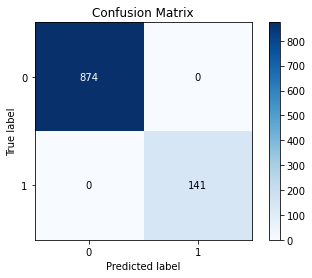

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       141

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015

Confusion matrix - XGBClassifier


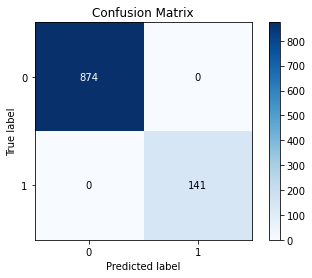

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       141

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015

Confusion matrix - GaussianNB


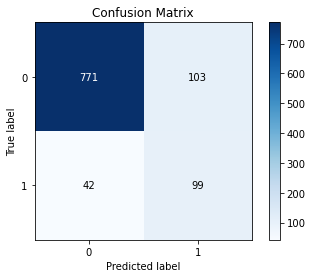

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       874
           1       0.49      0.70      0.58       141

    accuracy                           0.86      1015
   macro avg       0.72      0.79      0.75      1015
weighted avg       0.88      0.86      0.87      1015

Confusion matrix - KNeighborsClassifier


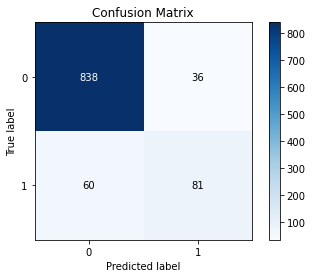

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       874
           1       0.69      0.57      0.63       141

    accuracy                           0.91      1015
   macro avg       0.81      0.77      0.79      1015
weighted avg       0.90      0.91      0.90      1015

Confusion matrix - AdaBoostClassifier


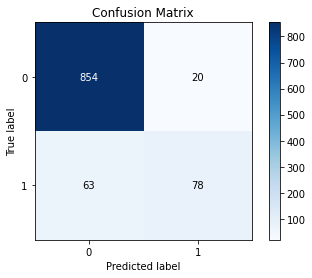

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       874
           1       0.80      0.55      0.65       141

    accuracy                           0.92      1015
   macro avg       0.86      0.77      0.80      1015
weighted avg       0.91      0.92      0.91      1015

Confusion matrix - SVC


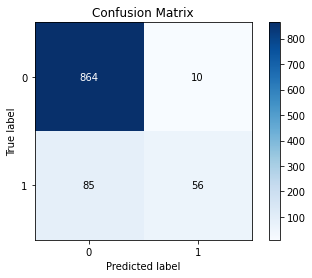

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       874
           1       0.85      0.40      0.54       141

    accuracy                           0.91      1015
   macro avg       0.88      0.69      0.74      1015
weighted avg       0.90      0.91      0.89      1015



In [23]:
# detailed evaluation of models on the training set (before optimization)

for model in models:
    train_predict(model, X_train_std, y_train)

## Feature Engineering

In [24]:
# logarithmic transformation

df_fe = df.copy()

log_feats = ["residual sugar", "free sulfur dioxide", "total sulfur dioxide", "alcohol"]

for feat in log_feats:
    df_fe['{}_log'.format(feat)] = np.log1p(df_fe[feat].values)

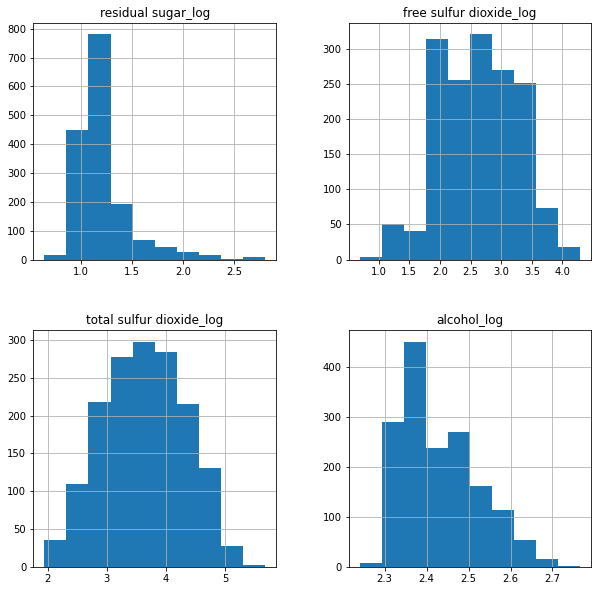

In [25]:
log_new = ["residual sugar_log", "free sulfur dioxide_log", "total sulfur dioxide_log", "alcohol_log"]

df_fe[log_new].hist(figsize=(10, 10));

In [26]:
# df_fe.drop(labels=log_feats, axis=1, inplace=True)
df_fe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,residual sugar_log,free sulfur dioxide_log,total sulfur dioxide_log,alcohol_log
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1.064711,2.484907,3.555348,2.341806
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1.280934,3.258097,4.219508,2.379546
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1.193922,2.772589,4.007333,2.379546
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1.064711,2.890372,4.110874,2.379546
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1.064711,2.484907,3.555348,2.341806


In [27]:
# Dealing with outliers 

z_scores = stats.zscore(df_fe)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_out_fe = df_fe[filtered_entries]

print("Number of records before removing outliers:: ", df_fe.shape[0])
print("Number of records after removing outliers:: ", df_out_fe.shape[0])
print("Number of records after removing outliers in each class: ", df_out_fe.good.value_counts())

Number of records before removing outliers::  1599
Number of records after removing outliers::  1446
Number of records after removing outliers in each class:  0    1246
1     200
Name: good, dtype: int64


In [28]:
# Training and test set

X = df_out_fe.drop(["quality", "good"], axis=1)
y = df_out_fe.good

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X, y, test_size=0.3, stratify = df_out_fe.good, random_state=0)

print("Train samples: {}.".format(X_train_fe.shape[0]))
print("Test samples: {}.".format(X_test_fe.shape[0]))
print("Percent of positive values in train set: {:.2f}%".format(sum(y_train_fe)/len(y_train_fe)))
print("Percent of positive values in test set: {:.2f}%".format(sum(y_test_fe)/len(y_test_fe)))

Train samples: 1012.
Test samples: 434.
Percent of positive values in train set: 0.14%
Percent of positive values in test set: 0.14%


In [29]:
# Data normalization (training set)

scaler = StandardScaler()
scaler.fit(X_train_fe)

X_train_fe_std = scaler.transform(X_train_fe)

# print(scaler.mean_, scaler.scale_)

# Data normalization (test set)

X_test_fe_std = scaler.transform(X_test_fe)

In [30]:
# evaluation of models before optimization
for model in models:
    run_model(model, X_train_fe_std, y_train_fe, skf)

LogisticRegression: fbeta: 0.879,   roc_auc_score: 0.881,   recall: 0.400
RandomForestClassifier: fbeta: 0.905,   roc_auc_score: 0.885,   recall: 0.507
XGBClassifier: fbeta: 0.891,   roc_auc_score: 0.869,   recall: 0.514
GaussianNB: fbeta: 0.839,   roc_auc_score: 0.867,   recall: 0.721
KNeighborsClassifier: fbeta: 0.870,   roc_auc_score: 0.832,   recall: 0.486
AdaBoostClassifier: fbeta: 0.878,   roc_auc_score: 0.878,   recall: 0.464
SVC: fbeta: 0.876,   roc_auc_score: 0.823,   recall: 0.336


Confusion matrix - LogisticRegression


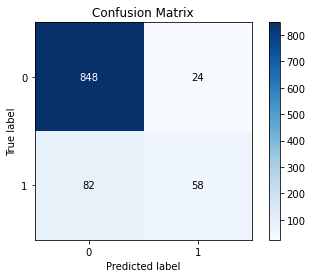

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       872
           1       0.71      0.41      0.52       140

    accuracy                           0.90      1012
   macro avg       0.81      0.69      0.73      1012
weighted avg       0.88      0.90      0.88      1012

Confusion matrix - RandomForestClassifier


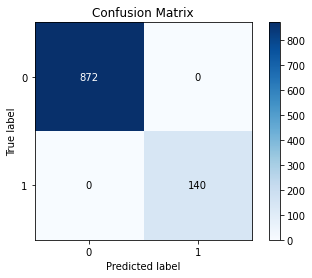

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       140

    accuracy                           1.00      1012
   macro avg       1.00      1.00      1.00      1012
weighted avg       1.00      1.00      1.00      1012

Confusion matrix - XGBClassifier


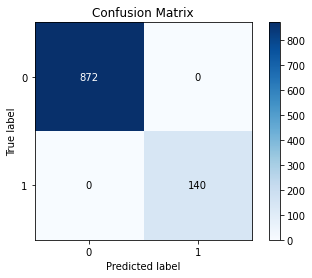

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       140

    accuracy                           1.00      1012
   macro avg       1.00      1.00      1.00      1012
weighted avg       1.00      1.00      1.00      1012

Confusion matrix - GaussianNB


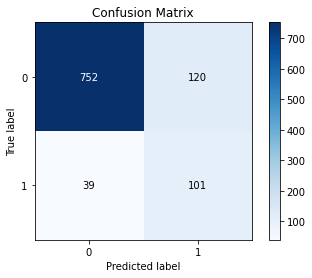

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       872
           1       0.46      0.72      0.56       140

    accuracy                           0.84      1012
   macro avg       0.70      0.79      0.73      1012
weighted avg       0.88      0.84      0.86      1012

Confusion matrix - KNeighborsClassifier


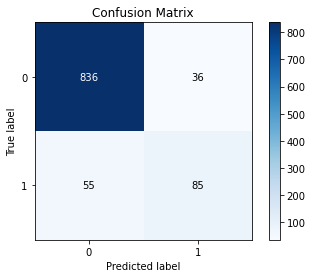

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       872
           1       0.70      0.61      0.65       140

    accuracy                           0.91      1012
   macro avg       0.82      0.78      0.80      1012
weighted avg       0.91      0.91      0.91      1012

Confusion matrix - AdaBoostClassifier


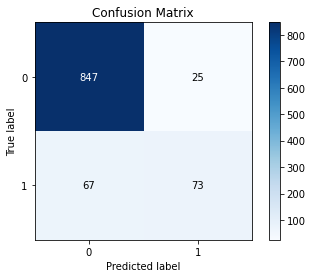

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       872
           1       0.74      0.52      0.61       140

    accuracy                           0.91      1012
   macro avg       0.84      0.75      0.78      1012
weighted avg       0.90      0.91      0.90      1012

Confusion matrix - SVC


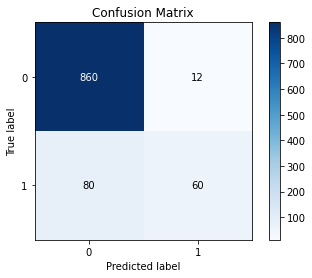

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       872
           1       0.83      0.43      0.57       140

    accuracy                           0.91      1012
   macro avg       0.87      0.71      0.76      1012
weighted avg       0.90      0.91      0.90      1012



In [31]:
# detailed evaluation of models on the training set (before optimization)

for model in models:
    train_predict(model, X_train_fe_std, y_train_fe)

## Oversampling

### sampling strategy=0.5

In [32]:
# instantiating over sampler                 
over_strategy = SMOTE(sampling_strategy=0.5, random_state=20)

X_combined, y_combined = over_strategy.fit_resample(X_train_fe_std, y_train_fe)

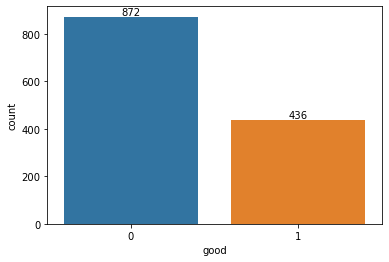

In [33]:
ax = sns.countplot(x=y_combined)

abs_values = y_combined.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [34]:
# evaluation of models before optimization
for model in models:
    run_model(model, X_combined, y_combined, skf)

LogisticRegression: fbeta: 0.830,   roc_auc_score: 0.900,   recall: 0.759
RandomForestClassifier: fbeta: 0.918,   roc_auc_score: 0.970,   recall: 0.888
XGBClassifier: fbeta: 0.918,   roc_auc_score: 0.967,   recall: 0.883
GaussianNB: fbeta: 0.819,   roc_auc_score: 0.889,   recall: 0.810
KNeighborsClassifier: fbeta: 0.868,   roc_auc_score: 0.944,   recall: 0.945
AdaBoostClassifier: fbeta: 0.860,   roc_auc_score: 0.926,   recall: 0.787
SVC: fbeta: 0.874,   roc_auc_score: 0.941,   recall: 0.796


Confusion matrix - LogisticRegression


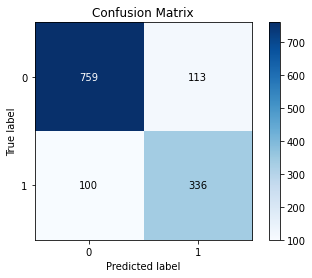

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       872
           1       0.75      0.77      0.76       436

    accuracy                           0.84      1308
   macro avg       0.82      0.82      0.82      1308
weighted avg       0.84      0.84      0.84      1308

Confusion matrix - RandomForestClassifier


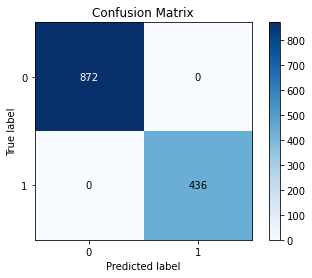

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       436

    accuracy                           1.00      1308
   macro avg       1.00      1.00      1.00      1308
weighted avg       1.00      1.00      1.00      1308

Confusion matrix - XGBClassifier


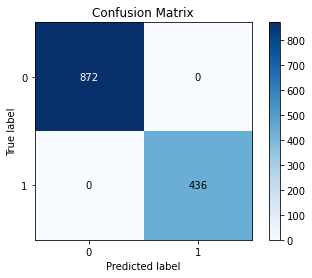

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       436

    accuracy                           1.00      1308
   macro avg       1.00      1.00      1.00      1308
weighted avg       1.00      1.00      1.00      1308

Confusion matrix - GaussianNB


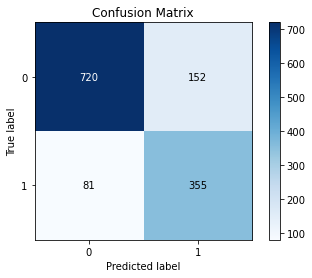

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       872
           1       0.70      0.81      0.75       436

    accuracy                           0.82      1308
   macro avg       0.80      0.82      0.81      1308
weighted avg       0.83      0.82      0.82      1308

Confusion matrix - KNeighborsClassifier


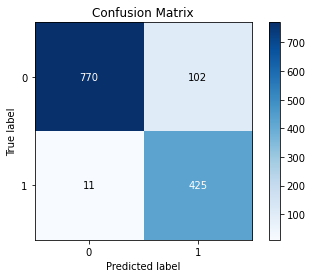

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       872
           1       0.81      0.97      0.88       436

    accuracy                           0.91      1308
   macro avg       0.90      0.93      0.91      1308
weighted avg       0.93      0.91      0.92      1308

Confusion matrix - AdaBoostClassifier


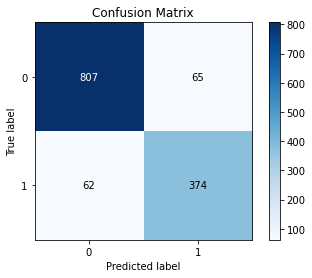

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       872
           1       0.85      0.86      0.85       436

    accuracy                           0.90      1308
   macro avg       0.89      0.89      0.89      1308
weighted avg       0.90      0.90      0.90      1308

Confusion matrix - SVC


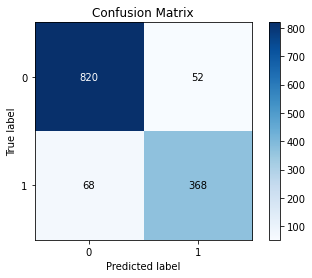

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       872
           1       0.88      0.84      0.86       436

    accuracy                           0.91      1308
   macro avg       0.90      0.89      0.90      1308
weighted avg       0.91      0.91      0.91      1308



In [35]:
# detailed evaluation of models on the training set (before optimization)

for model in models:
    train_predict(model, X_combined, y_combined)

### sampling strategy=0.75

In [36]:
# instantiating over sampler                 
over_strategy = SMOTE(sampling_strategy=0.75, random_state=20)

X_combined2, y_combined2 = over_strategy.fit_resample(X_train_fe_std, y_train_fe)

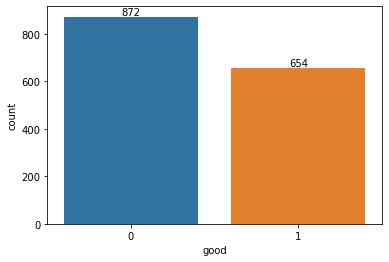

In [37]:
ax = sns.countplot(x=y_combined2)

abs_values = y_combined2.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [38]:
# evaluation of models before optimization
for model in models:
    run_model(model, X_combined2, y_combined2, skf)

LogisticRegression: fbeta: 0.825,   roc_auc_score: 0.899,   recall: 0.829
RandomForestClassifier: fbeta: 0.929,   roc_auc_score: 0.980,   recall: 0.940
XGBClassifier: fbeta: 0.925,   roc_auc_score: 0.977,   recall: 0.934
GaussianNB: fbeta: 0.809,   roc_auc_score: 0.885,   recall: 0.812
KNeighborsClassifier: fbeta: 0.868,   roc_auc_score: 0.949,   recall: 0.975
AdaBoostClassifier: fbeta: 0.859,   roc_auc_score: 0.929,   recall: 0.853
SVC: fbeta: 0.877,   roc_auc_score: 0.945,   recall: 0.870


Confusion matrix - LogisticRegression


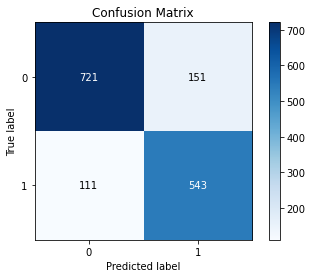

Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       872
           1       0.78      0.83      0.81       654

    accuracy                           0.83      1526
   macro avg       0.82      0.83      0.83      1526
weighted avg       0.83      0.83      0.83      1526

Confusion matrix - RandomForestClassifier


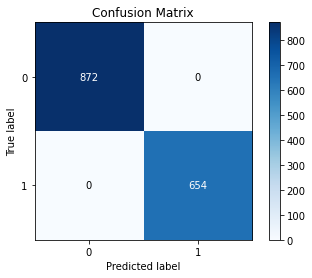

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       654

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

Confusion matrix - XGBClassifier


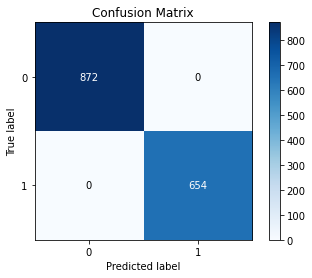

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       654

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

Confusion matrix - GaussianNB


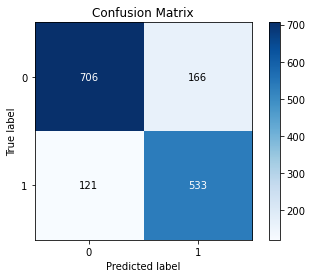

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       872
           1       0.76      0.81      0.79       654

    accuracy                           0.81      1526
   macro avg       0.81      0.81      0.81      1526
weighted avg       0.81      0.81      0.81      1526

Confusion matrix - KNeighborsClassifier


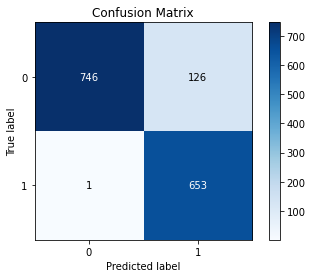

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       872
           1       0.84      1.00      0.91       654

    accuracy                           0.92      1526
   macro avg       0.92      0.93      0.92      1526
weighted avg       0.93      0.92      0.92      1526

Confusion matrix - AdaBoostClassifier


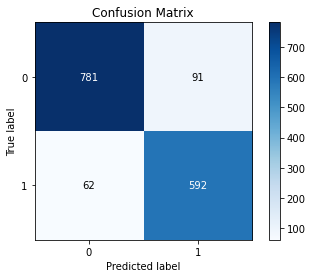

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       872
           1       0.87      0.91      0.89       654

    accuracy                           0.90      1526
   macro avg       0.90      0.90      0.90      1526
weighted avg       0.90      0.90      0.90      1526

Confusion matrix - SVC


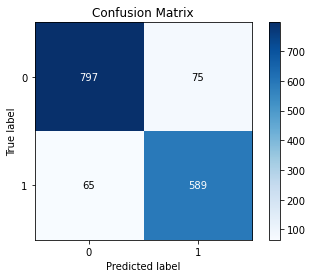

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       872
           1       0.89      0.90      0.89       654

    accuracy                           0.91      1526
   macro avg       0.91      0.91      0.91      1526
weighted avg       0.91      0.91      0.91      1526



In [39]:
# detailed evaluation of models on the training set (before optimization)

for model in models:
    train_predict(model, X_combined2, y_combined2)

### sampling strategy=1.0

In [40]:
# instantiating over and under sampler                 
over_strategy = SMOTE(random_state=20)

X_combined3, y_combined3 = over_strategy.fit_resample(X_train_fe_std, y_train_fe)

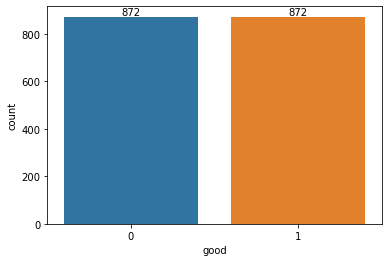

In [41]:
ax = sns.countplot(x=y_combined3)

abs_values = y_combined3.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [42]:
# evaluation of models before optimization
for model in models:
    run_model(model, X_combined3, y_combined3, skf)

LogisticRegression: fbeta: 0.830,   roc_auc_score: 0.903,   recall: 0.864
RandomForestClassifier: fbeta: 0.934,   roc_auc_score: 0.986,   recall: 0.967
XGBClassifier: fbeta: 0.934,   roc_auc_score: 0.984,   recall: 0.961
GaussianNB: fbeta: 0.808,   roc_auc_score: 0.889,   recall: 0.817
KNeighborsClassifier: fbeta: 0.879,   roc_auc_score: 0.955,   recall: 0.994
AdaBoostClassifier: fbeta: 0.864,   roc_auc_score: 0.935,   recall: 0.885
SVC: fbeta: 0.885,   roc_auc_score: 0.954,   recall: 0.897


Confusion matrix - LogisticRegression


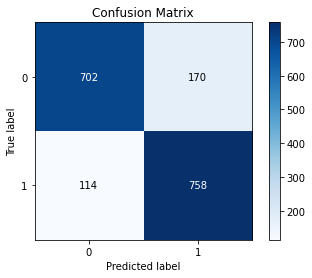

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       872
           1       0.82      0.87      0.84       872

    accuracy                           0.84      1744
   macro avg       0.84      0.84      0.84      1744
weighted avg       0.84      0.84      0.84      1744

Confusion matrix - RandomForestClassifier


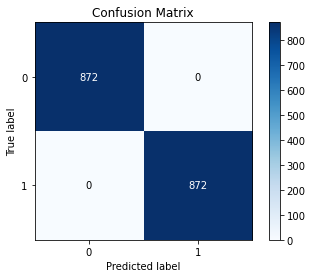

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1744
   macro avg       1.00      1.00      1.00      1744
weighted avg       1.00      1.00      1.00      1744

Confusion matrix - XGBClassifier


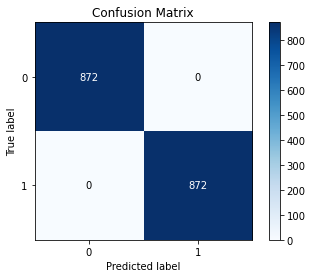

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1744
   macro avg       1.00      1.00      1.00      1744
weighted avg       1.00      1.00      1.00      1744

Confusion matrix - GaussianNB


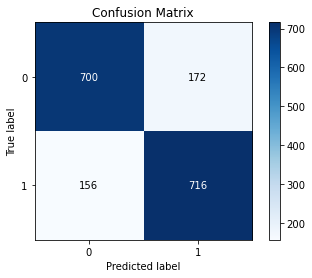

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       872
           1       0.81      0.82      0.81       872

    accuracy                           0.81      1744
   macro avg       0.81      0.81      0.81      1744
weighted avg       0.81      0.81      0.81      1744

Confusion matrix - KNeighborsClassifier


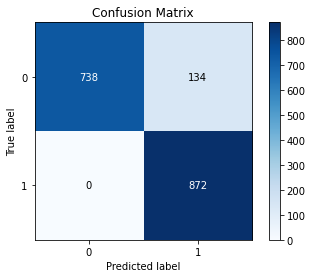

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       872
           1       0.87      1.00      0.93       872

    accuracy                           0.92      1744
   macro avg       0.93      0.92      0.92      1744
weighted avg       0.93      0.92      0.92      1744

Confusion matrix - AdaBoostClassifier


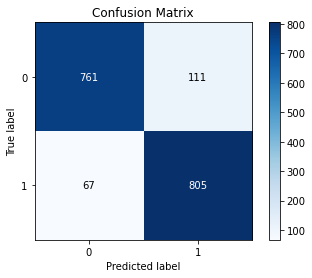

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       872
           1       0.88      0.92      0.90       872

    accuracy                           0.90      1744
   macro avg       0.90      0.90      0.90      1744
weighted avg       0.90      0.90      0.90      1744

Confusion matrix - SVC


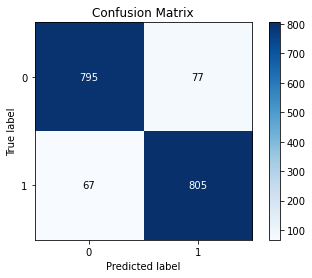

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       872
           1       0.91      0.92      0.92       872

    accuracy                           0.92      1744
   macro avg       0.92      0.92      0.92      1744
weighted avg       0.92      0.92      0.92      1744



In [43]:
# detailed evaluation of models on the training set (before optimization)

for model in models:
    train_predict(model, X_combined3, y_combined3)

### Choosing the best model

In [44]:
# Compare metrics for different models
models = [model_LR, model_RF, model_xgb, model_NB, model_KNN, model_ADA, model_SVM]

model_list = []
fbeta_cv = []
recall_train_0 = []
recall_train_1 = []
fbeta_cv_fe = []
recall_train_0_fe = []
recall_train_1_fe = []
fbeta_cv_comb = []
recall_train_0_comb = []
recall_train_1_comb = []


for model in models:
    
    model_name = type(model).__name__
    model_list.append(model_name)
    
    # scores before Feature Engineering
    
    fbeta_scorer = make_scorer(fbeta_score, beta=2.0, average="weighted")
    
    f_beta = cross_val_score(model, X_train_std, y_train, cv=skf, scoring=fbeta_scorer)
    fbeta_cv.append(f_beta.mean())
    
    model.fit(X_train_std, y_train)
    y_pred_train = model.predict(X_train_std)
    
    recall_train_no = recall_score(y_train,  y_pred_train, average=None)[0]
    recall_train_0.append(recall_train_no)
    
    recall_train_yes = recall_score(y_train,  y_pred_train, average=None)[1]
    recall_train_1.append(recall_train_yes)

    # scores after Feature Engineering
    
    f_beta_fe = cross_val_score(model, X_train_fe_std, y_train_fe, cv=skf, scoring=fbeta_scorer)
    fbeta_cv_fe.append(f_beta_fe.mean())
    
    model.fit(X_train_fe_std, y_train_fe)
    y_pred_train_fe = model.predict(X_train_fe_std)
    
    recall_train_no_fe = recall_score(y_train_fe,  y_pred_train_fe, average=None)[0]
    recall_train_0_fe.append(recall_train_no_fe)
    
    recall_train_yes_fe = recall_score(y_train_fe,  y_pred_train_fe, average=None)[1]
    recall_train_1_fe.append(recall_train_yes_fe)
    
    # scores after oversampling (samplin_strategy=0.5)
    
    f_beta_comb = cross_val_score(model, X_combined, y_combined, cv=skf, scoring=fbeta_scorer)
    fbeta_cv_comb.append(f_beta_comb.mean())
    
    model.fit(X_combined, y_combined)
    y_pred_train_comb = model.predict(X_combined)
    
    recall_train_no_comb = recall_score(y_combined,  y_pred_train_comb, average=None)[0]
    recall_train_0_comb.append(recall_train_no_comb)
    
    recall_train_yes_comb = recall_score(y_combined,  y_pred_train_comb, average=None)[1]
    recall_train_1_comb.append(recall_train_yes_comb)


In [45]:
scores_ = pd.DataFrame({"Model": model_list, 
                       "fbeta": fbeta_cv, 
                       "recall dla 0": recall_train_0, 
                       "recall dla 1": recall_train_1,
                       "fbeta po FE": fbeta_cv_fe,
                       "recall po FE dla 0": recall_train_0_fe,
                       "recall po FE dla 1": recall_train_1_fe,
                       "fbeta po oversampl": fbeta_cv_comb,
                       "recall po oversampl dla 0": recall_train_0_comb,
                       "recall po oversampl dla 1": recall_train_1_comb})
scores_

,Model,fbeta,recall dla 0,recall dla 1,fbeta po FE,recall po FE dla 0,recall po FE dla 1,fbeta po oversampl,recall po oversampl dla 0,recall po oversampl dla 1
0,LogisticRegression,0.879169,0.966819,0.382979,0.878606,0.972477,0.414286,0.830334,0.870413,0.770642
1,RandomForestClassifier,0.896035,1.000000,1.000000,0.904924,1.000000,1.000000,0.918147,1.000000,1.000000
2,XGBClassifier,0.896430,1.000000,1.000000,0.891375,1.000000,1.000000,0.918163,1.000000,1.000000
3,GaussianNB,0.855292,0.882151,0.702128,0.839361,0.862385,0.721429,0.818993,0.825688,0.814220
4,KNeighborsClassifier,0.868385,0.958810,0.574468,0.869898,0.958716,0.607143,0.867621,0.883028,0.974771
5,AdaBoostClassifier,0.870304,0.977117,0.553191,0.878494,0.971330,0.521429,0.860441,0.925459,0.857798
6,SVC,0.880095,0.988558,0.397163,0.875664,0.986239,0.428571,0.873550,0.940367,0.844037


In [46]:
# Scores for all models
models = [model_LR, model_RF, model_xgb, model_NB, model_KNN, model_ADA, model_SVM]

X_train = [X_train_std, X_train_fe_std, X_combined, X_combined2, X_combined3]
y_train = [y_train, y_train_fe, y_combined, y_combined2, y_combined3]
list_x = ["X_train", "X_train po FE", "X_train_0.5", "X_train_0.75", "X_train_1.0"]

model_list = []
fbeta_cv = []
recall_train_0 = []
recall_train_1 = []

for model in models:
    
    for x, y, i in zip(X_train, y_train, list_x):
        
        model_name = type(model).__name__
        model_list.append((model_name, i))
    
        fbeta_scorer = make_scorer(fbeta_score, beta=2.0, average="weighted")

        f_beta = cross_val_score(model, x, y, cv=skf, scoring=fbeta_scorer)
        fbeta_cv.append(f_beta.mean())

        model.fit(x, y)
        y_pred_train = model.predict(x)

        recall_train_no = recall_score(y,  y_pred_train, average=None)[0]
        recall_train_0.append(recall_train_no)

        recall_train_yes = recall_score(y,  y_pred_train, average=None)[1]
        recall_train_1.append(recall_train_yes)
    

scores = pd.DataFrame({"Model": model_list, 
                       "fbeta_cv": fbeta_cv, 
                       "recall dla 0": recall_train_0, 
                       "recall dla 1": recall_train_1})

In [47]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
scores.style.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,Model,fbeta_cv,recall dla 0,recall dla 1
0,"('LogisticRegression', 'X_train')",0.879169,0.966819,0.382979
1,"('LogisticRegression', 'X_train po FE')",0.878606,0.972477,0.414286
2,"('LogisticRegression', 'X_train_0.5')",0.830334,0.870413,0.770642
3,"('LogisticRegression', 'X_train_0.75')",0.824877,0.826835,0.830275
4,"('LogisticRegression', 'X_train_1.0')",0.830367,0.805046,0.869266
5,"('RandomForestClassifier', 'X_train')",0.896035,1.000000,1.000000
6,"('RandomForestClassifier', 'X_train po FE')",0.904924,1.000000,1.000000
7,"('RandomForestClassifier', 'X_train_0.5')",0.918147,1.000000,1.000000
8,"('RandomForestClassifier', 'X_train_0.75')",0.929138,1.000000,1.000000
9,"('RandomForestClassifier', 'X_train_1.0')",0.933703,1.000000,1.000000


#### Based on the above scores (fbeta score), the two best models were selected: RandomForest i XgBoost

#### Oversampling effect

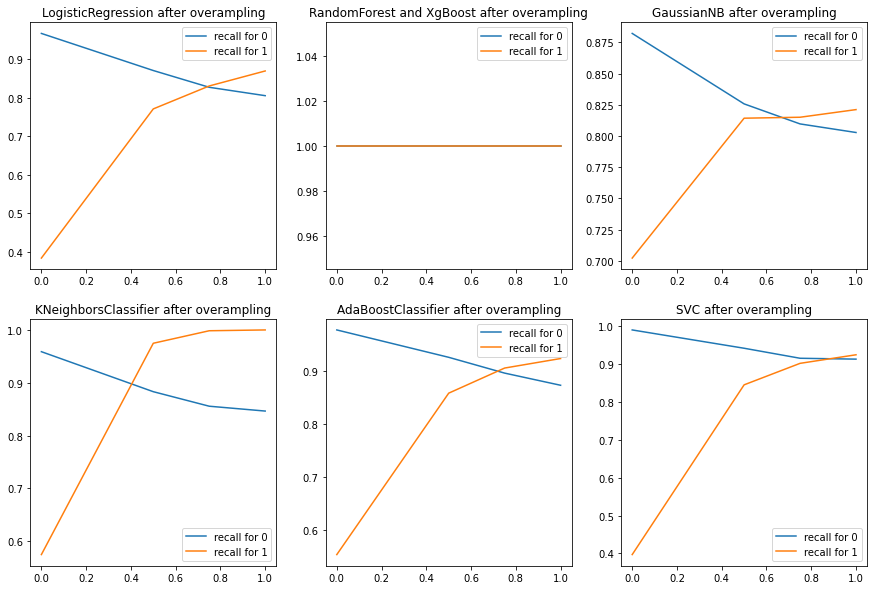

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

axes[0][0].plot([0,0.5,0.75,1.0], scores.iloc[[0, 2, 3, 4]]["recall dla 0"])
axes[0][0].plot([0,0.5,0.75,1.0], scores.iloc[[0, 2, 3, 4]]["recall dla 1"])
axes[0][0].set_title("LogisticRegression after overampling")
axes[0][0].legend(["recall for 0", "recall for 1"])

axes[0][1].plot([0,0.5,0.75,1.0], scores.iloc[[10, 12, 13, 14]]["recall dla 0"])
axes[0][1].plot([0,0.5,0.75,1.0], scores.iloc[[10, 12, 13, 14]]["recall dla 1"])
axes[0][1].set_title("RandomForest and XgBoost after overampling")
axes[0][1].legend(["recall for 0", "recall for 1"])

axes[0][2].plot([0,0.5,0.75,1.0], scores.iloc[[15, 17, 18, 19]]["recall dla 0"])
axes[0][2].plot([0,0.5,0.75,1.0], scores.iloc[[15, 17, 18, 19]]["recall dla 1"])
axes[0][2].set_title("GaussianNB after overampling")
axes[0][2].legend(["recall for 0", "recall for 1"])

axes[1][0].plot([0,0.5,0.75,1.0], scores.iloc[[20, 22, 23, 24]]["recall dla 0"])
axes[1][0].plot([0,0.5,0.75,1.0], scores.iloc[[20, 22, 23, 24]]["recall dla 1"])
axes[1][0].set_title("KNeighborsClassifier after overampling")
axes[1][0].legend(["recall for 0", "recall for 1"])

axes[1][1].plot([0,0.5,0.75,1.0], scores.iloc[[25, 27, 28, 29]]["recall dla 0"])
axes[1][1].plot([0,0.5,0.75,1.0], scores.iloc[[25, 27, 28, 29]]["recall dla 1"])
axes[1][1].set_title("AdaBoostClassifier after overampling")
axes[1][1].legend(["recall for 0", "recall for 1"])

axes[1][2].plot([0,0.5,0.75,1.0], scores.iloc[[30, 32, 33, 34]]["recall dla 0"])
axes[1][2].plot([0,0.5,0.75,1.0], scores.iloc[[30, 32, 33, 34]]["recall dla 1"])
axes[1][2].set_title("SVC after overampling")
axes[1][2].legend(["recall for 0", "recall for 1"]);

### Parameters optimization for selected models

### RandomForest

In [ ]:
# Random Forest

model_RF = RandomForestClassifier(random_state=12).fit(X_combined3, y_combined3)

# Selection of optimal parameters for the model

param_grid_RF = {
    "n_estimators": [50, 70, 100, 150, 200],
    "criterion": ["entropy", "gini"],
    "max_features": [None, 0.4, 0.8],
    "class_weight": ["balanced", "balanced_subsample"],
    "min_samples_split": [5, 10, 25, 45],
    "max_leaf_nodes": [10, 25, 50, 60]
             }

grid_RF = GridSearchCV(model_RF, param_grid=param_grid_RF, cv=skf, scoring=fbeta_scorer, verbose=0, n_jobs=-1)
grid_RF.fit(X_combined3, y_combined3)

print("The best parameters: ", grid_RF.best_params_)
print("The best score: ", grid_RF.best_score_)

In [49]:
# The best parameters for all features
# Najlepsze parametry:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 0.4, 'max_leaf_nodes': 60, 'min_samples_split': 5, 'n_estimators': 70}
# Najwyższy score:  0.9290503503778392

# The best parameters after features without _log removed
# Najlepsze parametry:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_split': 10, 'n_estimators': 100}
# Najwyższy score:  0.9265181512609418

# The best parameter without FE
# Najlepsze parametry:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 0.4, 'max_leaf_nodes': 60, 'min_samples_split': 5, 'n_estimators': 70}
# Najwyższy score:  0.9179311161345295

# The best parameters for the model (all features)

# model_RF_best = RandomForestClassifier(random_state=12, **grid_RF.best_params_)

model_RF_best = RandomForestClassifier(random_state=12, class_weight="balanced", criterion="entropy", 
                                       max_features=0.4, max_leaf_nodes=60, min_samples_split=5, n_estimators=70)


model_RF_best.fit(X_combined3, y_combined3)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=0.4, max_leaf_nodes=60, min_samples_split=5,
                       n_estimators=70, random_state=12)

Training set
fbeta_score:  0.9821895592540417
roc_auc_score:  0.9994318660045451

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       872
           1       0.97      0.99      0.98       872

    accuracy                           0.98      1744
   macro avg       0.98      0.98      0.98      1744
weighted avg       0.98      0.98      0.98      1744



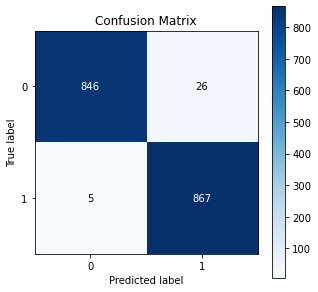

In [50]:
# Prediction (training set)
y_pred_t = model_RF_best.predict(X_combined3)

print("Training set")
print("fbeta_score: ", fbeta_score(y_combined3, y_pred_t, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_combined3, model_RF_best.predict_proba(X_combined3)[:, 1]))
print()
print("Classification report: \n", classification_report(y_combined3, y_pred_t, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_combined3, y_pred=y_pred_t, normalize=False, figsize=(5, 5));

Test set
fbeta_score:  0.888750874665143
roc_auc_score:  0.913458110516934

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       374
           1       0.57      0.72      0.64        60

    accuracy                           0.89       434
   macro avg       0.76      0.82      0.79       434
weighted avg       0.90      0.89      0.89       434



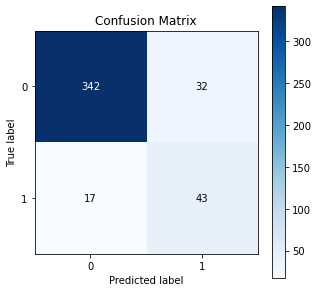

In [51]:
# Prediction (test set)

y_pred_RF = model_RF_best.predict(X_test_fe_std)
print("Test set")
print("fbeta_score: ", fbeta_score(y_test_fe, y_pred_RF, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_test_fe, model_RF_best.predict_proba(X_test_fe_std)[:, 1]))
print()
print("Classification report: \n", classification_report(y_test_fe, y_pred_RF, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_test_fe, y_pred=y_pred_RF, normalize=False, figsize=(5, 5));

In [52]:
feature_importances = pd.DataFrame(model_RF_best.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
alcohol_log,0.178172
alcohol,0.166546
sulphates,0.139754
volatile acidity,0.090361
citric acid,0.057877
total sulfur dioxide_log,0.054025
pH,0.044279
residual sugar_log,0.038861
total sulfur dioxide,0.036105
residual sugar,0.036029


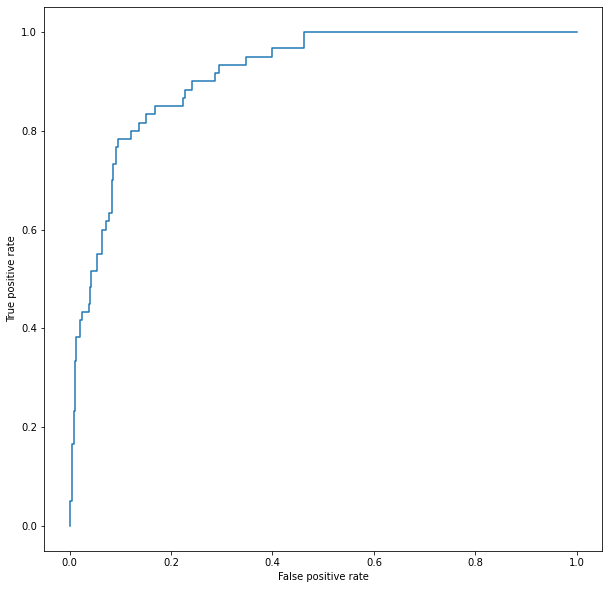

In [53]:
# Receiver operating characteristic

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_fe, model_RF_best.predict_proba(X_test_fe_std)[:, 1])

plt.figure(figsize=(10, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

### XgBoost

In [ ]:
# XgBoost

model_xgb = xgb.XGBClassifier(random_state=12, eval_metric="error").fit(X_combined3, y_combined3)

# Parameters optimization

param_grid_xgb = {
            "n_estimators": [100, 150, 200, 300],
            "max_depth": [2, 5, 10],
            "learning_rate": [0.1, 0.2, 0.5],
            "booster": ["gbtree"],
            "min_child_weight": [2, 4, 6, 10, 50],
            "subsample": [0.5, 0.8],
            "colsample_bylevel": [0.5, 0.8],
            "reg_alpha": [1, 5],
            "reg_lambda": [5, 10, 15]
    
}

grid_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=skf, scoring=fbeta_scorer, verbose=0, n_jobs=-1)
grid_xgb.fit(X_combined3, y_combined3)

print("The best parameters: ", grid_xgb.best_params_)
print("The best score: ", grid_xgb.best_score_)

In [54]:
# The best parameters for all features
# Najlepsze parametry:  {'booster': 'gbtree', 'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.8}
# Najwyższy score:  0.9430555445106302

# The best parameters after features without _log removed
# Najlepsze parametry:  {'booster': 'gbtree', 'colsample_bylevel': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.8}
# Najwyższy score:  0.9462814316931896

# The best parameter without FE
# Najlepsze parametry:  {'booster': 'gbtree', 'colsample_bylevel': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.5}
# Najwyższy score:  0.9414718863364409

# The best parameters for the model (all features)

# model_xgb_best = xgb.XGBClassifier(eval_metric="error", random_state=12, **grid_xgb.best_params_)
model_xgb_best = xgb.XGBClassifier(eval_metric="error", random_state=12, booster="gbtree", 
                                   colsample_bylevel=0.8, learning_rate=0.5, max_depth=5, min_child_weight=2, 
                                   n_estimators=300, reg_alpha=1, reg_lambda=10, subsample=0.8)

model_xgb_best.fit(X_combined3, y_combined3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=12,
              reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training set
fbeta_score:  1.0
roc_auc_score:  1.0

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1744
   macro avg       1.00      1.00      1.00      1744
weighted avg       1.00      1.00      1.00      1744



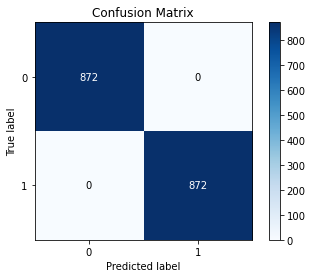

In [55]:
# Prediction (training set)

y_pred_t_xgb = model_xgb_best.predict(X_combined3)

print("Training set")
print("fbeta_score: ", fbeta_score(y_combined3, y_pred_t_xgb, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_combined3, model_xgb_best.predict_proba(X_combined3)[:, 1]))
print()
print("Classification report: \n", classification_report(y_combined3, y_pred_t_xgb, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_combined3, y_pred=y_pred_t_xgb, normalize=False);

Test set
fbeta_score:  0.8894009216589863
roc_auc_score:  0.8848039215686275

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       374
           1       0.60      0.60      0.60        60

    accuracy                           0.89       434
   macro avg       0.77      0.77      0.77       434
weighted avg       0.89      0.89      0.89       434



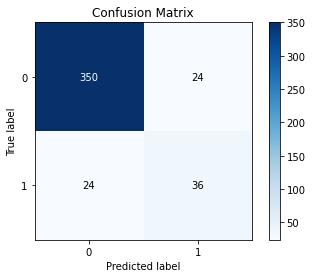

In [56]:
# Prediction (test set)

y_pred_xgb = model_xgb_best.predict(X_test_fe_std)
print("Test set")
print("fbeta_score: ", fbeta_score(y_test_fe, y_pred_xgb, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_test_fe, model_xgb_best.predict_proba(X_test_fe_std)[:, 1]))
print()
print("Classification report: \n", classification_report(y_test_fe, y_pred_xgb, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_test_fe, y_pred=y_pred_xgb, normalize=False);

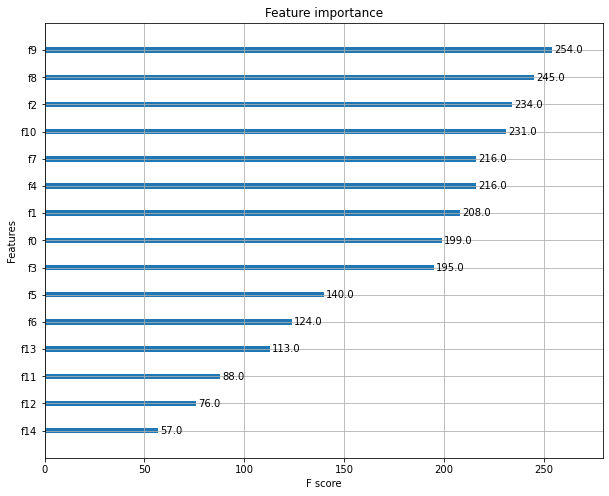

In [57]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(model_xgb_best);

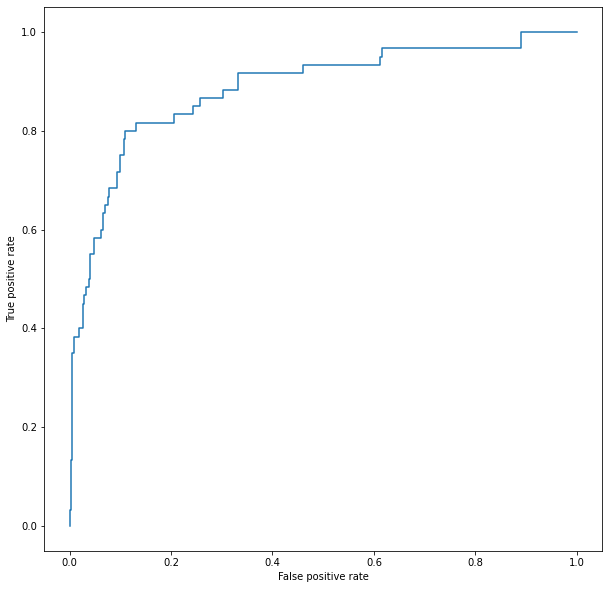

In [58]:
# Receiver operating characteristic

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_fe, model_xgb_best.predict_proba(X_test_fe_std)[:, 1])

plt.figure(figsize=(10, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

### Removal of low importance features acording Random Forest

In [59]:
# Removal of feature importance < 0.036, data without normalization

to_drop = ["chlorides", "free sulfur dioxide_log", "free sulfur dioxide", "density", "fixed acidity"]
df_imp = df_out_fe.drop(labels=to_drop, axis=1)

# Training and test set

X = df_imp.drop(["quality", "good"], axis=1)
y = df_imp.good

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X, y, test_size=0.3, stratify = df_imp.good, random_state=0)

# Oversampling, sampling_strategy=1.0

over_strategy = SMOTE(random_state=20)
X_combined4, y_combined4 = over_strategy.fit_resample(X_train_imp, y_train_imp)

In [ ]:
model_RFi = RandomForestClassifier(random_state=12).fit(X_combined4, y_combined4)

# Parameters optimization for model

param_grid_RFi = {
    "n_estimators": [50, 70, 100, 150, 200],
    "criterion": ["entropy", "gini"],
    "max_features": [None, 0.4, 0.8],
    "class_weight": ["balanced", "balanced_subsample"],
    "min_samples_split": [5, 10, 25, 45],
    "max_leaf_nodes": [10, 25, 50, 60]
             }

grid_RFi = GridSearchCV(model_RFi, param_grid=param_grid_RFi, cv=skf, scoring=fbeta_scorer, verbose=0, n_jobs=-1)
grid_RFi.fit(X_combined4, y_combined4)

print("The best parameters: ", grid_RFi.best_params_)
print("The best score: ", grid_RFi.best_score_)

In [60]:
# The best parameters for model

# Najlepsze parametry:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 0.8, 'max_leaf_nodes': 60, 'min_samples_split': 5, 'n_estimators': 70}
# Najwyższy score:  0.9153032717671705

model_RFi_best = RandomForestClassifier(random_state=12, class_weight="balanced_subsample", criterion="entropy", max_features=0.8, max_leaf_nodes=60, min_samples_split=5, n_estimators=70)

model_RFi_best.fit(X_combined4, y_combined4)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=0.8, max_leaf_nodes=60, min_samples_split=5,
                       n_estimators=70, random_state=12)

fbeta_score:  0.9787555146210747
roc_auc_score:  0.9982692955138456

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       872
           1       0.97      0.99      0.98       872

    accuracy                           0.98      1744
   macro avg       0.98      0.98      0.98      1744
weighted avg       0.98      0.98      0.98      1744



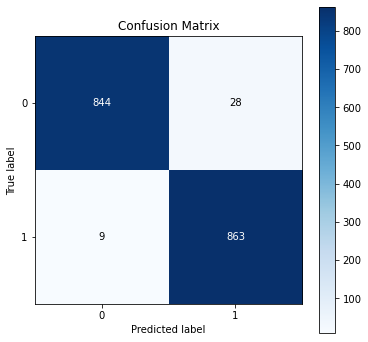

In [68]:
# Prediction (training set)
y_pred_ti = model_RFi_best.predict(X_combined4)

print("fbeta_score: ", fbeta_score(y_combined4, y_pred_ti, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_combined4, model_RFi_best.predict_proba(X_combined4)[:, 1]))
print()
print("Classification report: \n", classification_report(y_combined4, y_pred_ti, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_combined4, y_pred=y_pred_ti, normalize=False, figsize=(6, 6));

fbeta_score:  0.8867566010711172
roc_auc_score:  0.8950089126559715

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       374
           1       0.56      0.75      0.64        60

    accuracy                           0.88       434
   macro avg       0.76      0.83      0.79       434
weighted avg       0.90      0.88      0.89       434



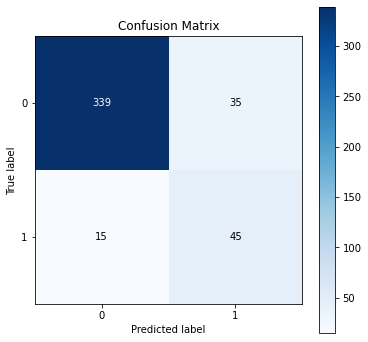

In [67]:
# Prediction (test set)

y_pred_RFi = model_RFi_best.predict(X_test_imp)

print("fbeta_score: ", fbeta_score(y_test_imp, y_pred_RFi, beta=2.0, average="weighted"))
print("roc_auc_score: ", roc_auc_score(y_test_imp, model_RFi_best.predict_proba(X_test_imp)[:, 1]))
print()
print("Classification report: \n", classification_report(y_test_imp, y_pred_RFi, zero_division=1))
skplt.metrics.plot_confusion_matrix(y_true=y_test_imp, y_pred=y_pred_RFi, normalize=False, figsize=(6, 6));

In [63]:
feature_importances = pd.DataFrame(model_RFi_best.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
alcohol,0.279032
sulphates,0.167221
alcohol_log,0.154953
volatile acidity,0.083215
total sulfur dioxide_log,0.069499
pH,0.059380
total sulfur dioxide,0.057317
citric acid,0.056356
residual sugar,0.037364
residual sugar_log,0.035662


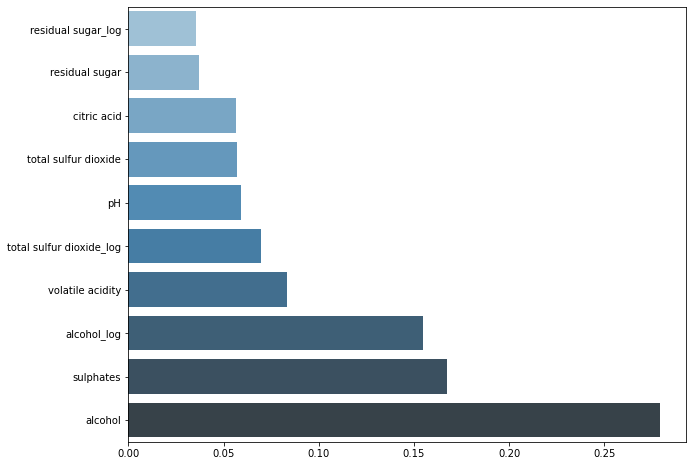

In [64]:
sns.barplot(x=np.sort(model_RFi_best.feature_importances_), y=feature_importances.sort_values('importance', ascending=True).index, palette="Blues_d");

roc_auc_score:  0.8950089126559715


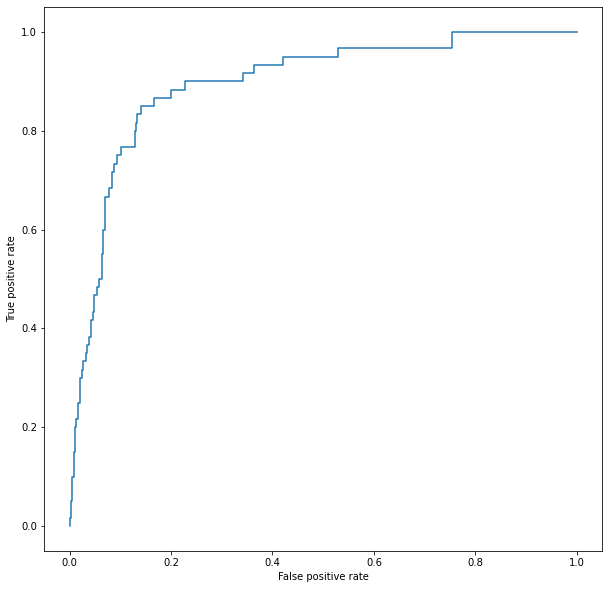

In [65]:
# Receiver operating characteristic
print("roc_auc_score: ", roc_auc_score(y_test_imp, model_RFi_best.predict_proba(X_test_imp)[:, 1]))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_imp, model_RFi_best.predict_proba(X_test_imp)[:, 1])

plt.figure(figsize=(10, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

##### Removal of low relevance features and application of data without standardization increases recall for class 1

### The above model was chosen to build the application